# Classification Performance Metrics

In this notebook we will go through different ways of characterizing the performance of a classifier.

## Confusion Matrix

In a typical binary classification problem the performance of the classifier can be summarized in a confusion matrix. The confusion matrix is a 2x2 matrix that summarizes the number of true positives, true negatives, false positives and false negatives. The confusion matrix can be used to calculate a number of performance metrics.

Typically, we have the true class labels $y$ and the predicted class labels $\hat{y}$. The confusion matrix is then defined as:

| | $\hat{y}=0$ | $\hat{y}=1$ |
| --- | --- | --- |
| $y=0$ | True Negatives (TN) | False Positives (FP) |
| $y=1$ | False Negatives (FN) | True Positives (TP) |

This matrix can be used to calculate a number of performance metrics. Some of the metrics are conditioned on true class labels, they are normalized by row sums. Other metrics are conditioned on predicted class labels, they are normalized by column sums. And yet others are normalized by total sums.

One important aspect of the confusion matrix is whether the rows are balanced or not. There are multiple scenarios where class counts are not balanced:
- Diagnostic tests, the number of healthy people are generally much higher than the number of people having a sickness.
- Spam detection, the number of spam emails are generally much lower than the number of non-spam emails.
- Fraud detection, the number of non-fraudulent transactions are generally much higher than the number of fraudulent transactions.

The sheer amount of negative class counts may result in a large number of false positives. When we calculate the number of times positive tests results are distributed across positive and negative classes, it might be possible that many of the positive scores come from false positives.

## Prevalence

This is a metric that is used in diagnostic tests. It is the fraction of positive class labels in the population. It is calculated as the number of positive class labels divided by the total number of samples.
In medical research it is usual that prevelance to be a number between 0.01 and 0.1.

## TP, TN, FP, FN

When we see `True Positives (TP)` and `True Negatives (TN)` we should think of the classifier as being correct.

When we see `False Positives (FP)` and `False Negatives (FN)` we should think of the classifier as being incorrect.

## Rates
Rate generally means row sum normalization.

### True Positive Rate  (TPR)
When we talk about `TP rate`, we are talking about the fraction of positive samples that are correctly classified.

$$ TP rate = \frac{TP}{TP + FN} $$

TPR is maximized when the decision threshold is at its lowest point. All samples are classified as positive, hence all true classses are correctly classified.

### False Positive Rate (FPR)
When we talk about `FP rate`, we are talking about the fraction of negative samples that are incorrectly classified. This is also known as the `false alarm rate`.

$$ FP rate = \frac{FP}{FP + TN} $$

When the decision threshold is at its lowest point, the FPR is maximized and equals to 1. This means all the samples are classified as positive irrespective of their true class labels.

### True Negative Rate (TNR)

By simple extension, `1 - FP rate` is also known as `true negative rate`.


## Recall (Sensitivity, True Positive Rate (TPR), Probability of Detection, Hit Rate)

`Recall` is the fraction of positive samples that are correctly classified. It is the same thing as `TPR`. It is calculated as the number of true positives divided by the sum of true positives and false negatives. In other words, it is the fraction of positive samples that are correctly classified. Recall is also known as `sensitivity` or `true positive rate` or `hit rate` or `probability of detection`.

$$ Recall = \frac{TP}{TP + FN} $$

In Bayesian terms, `Recall is conditioned on true class labels. It is the probability of a positive prediction given positive class. This is to say the normalization of counts has been done by row sums. Note that the conditional probability is conditioned on the true class label.

$$ Recall = P(\hat{y}=1 | y=1) $$


## Specificity (True Negative Rate, 1-FP rate, Selectivity)

This is also an row-sum metric but operates on the negative class labels. This is the probability of negative predictions given the negative class.

$$ Specificity = \frac{TN}{TN + FP} $$

## Precision
This is a column-sum metric, it normalizes the counts based on the test results, not the true class labels.

Precision is the fraction of positive predictions that are correct. It is calculated as the number of true positives divided by the sum of true positives and false positives. In other words, it is the fraction of positive predictions that are correct. It is the complement of false discovery rate.

$$ Precision = \frac{TP}{TP + FP} $$

In Bayesian terms, it is the probability of a positive class given positive prediction, it is conditioned on the predicted class label.

$$ Precision = P(y=1 | \hat{y}=1) $$

## Accuracy (ACC)
Accuracy is the fraction of correct predictions. It is calculated as the sum of true positives and true negatives divided by the total number of samples.

$$ Accuracy = \frac{TP + TN}{TP + TN + FP + FN} $$

## Decision Scores

In a typical scenario, the classification results from the binarization of a decision score based on a threshold. The decision score is a real number that is calculated by the classifier. The decision score is then compared to a threshold to determine the class label. There is one single threshold that operates on both classes. In scikit learn, the default threshold is 0.5. If the decision score is greater than 0.5, the class label is 1, otherwise it is 0.

## Receiver Operating Characteristic (ROC) Curve

When we move the threshold from small towards larger numbers, there are two counts that decreases.
- True positives (sensitivity)
- False positives (1-specificity)

When the decision threshold is decreased the test becomes more sensitivity and less specific. This inverse relationship depends on the distribution of the scores, however most of the time it is true.

The trade-off between increase of sensitivity should be balanced with the decrease in specificity. That is, having more true positives should only be accepted if the number of false positives does not increase in relation.

If we plot these for different threshold values, (assuming a decent classifier) we would see that the false positives rate would start to decrease earlier than the true positive rate. This is because the true positive scores are (again assuming a decent classifier) be shifted toward larger values. FPR should be decreasing while the TPR still plateaus.

In these curves we can actually see whether a decrease in our true positive is worth the decrease in false positives. For example, if moving the threshold $\Delta$T, leads to 10% decrease in true positive but a 50% increase in false positives, most likely we would decide that increasing the threshold was not worth it.

In a ROC curve we plot FPR against TPR for different threshold values. When these numbers do decrease in the same speed, we curve would move from (1,1) point on the right upper corner towards the (0,0) point on the left lower corner along the diagonal.

However if the curve moves horizontally from right to left, that would be an indication that the TPR is rather invariant to threshold changes.

ROC curve shows us that it is possible to set the precision a test to any required value by changing the threshold. Same holds for the sensitivity. However, controling jointly both parameters is not possible and The ROC curve shows us the trade-off between sensitivity and specificity.





                                  Raw Confusion Matrix:
                                  |                PREDICTED               ||
                        -----------------------------------------------------
                                  |            0       |           1       ||
                        -----------------------------------------------------
                     T            |        True Neg.   |       False Pos.  ||
                     R       0    |          261.00     |        243.00       ||
                     U  -----------------------------------------------------
                     E            |        False Neg.  |       True Pos    ||
                            1     |          239.00      |       257.00        ||
                        -----------------------------------------------------
                

                                  Normalized Confusion Matrix:
                                  |                PREDICTED               

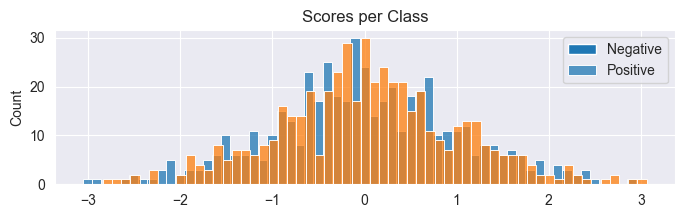

In [1]:
# Data generating functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def get_scores(negative_sample_n = 50,
               positive_sample_n = 50,
               mu = [0, 0],
               sigma = [1, 1]
               ):

    # create true class labels
    y = np.hstack( [np.zeros(negative_sample_n), np.ones(positive_sample_n)])
    # create decision scores with noise (sigma = 1)
    scores = np.array([sigma[i]*np.random.randn()+mu[i] for i in y.astype(int)])
    return y, scores

def get_classes(scores, threshold):
    return (scores > threshold).astype(float)

def confusion_matrix(y, yhat, normalized=False, row_normalized=False, col_normalized=False):
    c = np.array([[np.sum((y == 0) & (yhat == 0)), np.sum((y == 0) & (yhat == 1))],
                     [np.sum((y == 1) & (yhat == 0)), np.sum((y == 1) & (yhat == 1))]])
    if normalized:
        c = c / np.sum(c)
    elif row_normalized:
        c = c / np.sum(c, axis=1, keepdims=True)
    elif col_normalized:
        c = c / np.sum(c, axis=0, keepdims=True)
    return c


def plot_table(tn, fp, fn, tp, title):
        msg =  f'''
                                  {title}
                                  |                PREDICTED               ||
                        -----------------------------------------------------
                                  |            0       |           1       ||
                        -----------------------------------------------------
                     T            |        True Neg.   |       False Pos.  ||
                     R       0    |          {tn:.2f}     |        {fp:.2f}       ||
                     U  -----------------------------------------------------
                     E            |        False Neg.  |       True Pos    ||
                            1     |          {fn:.2f}      |       {tp:.2f}        ||
                        -----------------------------------------------------
                '''
        return msg

def print_confusion_matrix(y, y_hat):

    df = pd.DataFrame(confusion_matrix(y, y_hat))
    print(plot_table(df[0][0], df[0][1], df[1][0], df[1][1], title='Raw Confusion Matrix:'))

    df = pd.DataFrame(confusion_matrix(y, y_hat, normalized=True))
    print(plot_table(df[0][0], df[0][1], df[1][0], df[1][1],  title='Normalized Confusion Matrix:'))

    df = pd.DataFrame(confusion_matrix(y, y_hat, row_normalized=True))
    print(plot_table(df[0][0], df[0][1], df[1][0], df[1][1],  title='Row Normalized Confusion Matrix:'))

    df = pd.DataFrame(confusion_matrix(y, y_hat, col_normalized=True))
    print(plot_table(df[0][0], df[0][1], df[1][0], df[1][1], title='Column Normalized Confusion Matrix:'))

# plot side by side both score distributions
import seaborn as sns
def plot_scores(y, scores):
    fig, ax = plt.subplots(1, 1, figsize=(8, 2))
    sns.histplot(scores[y == 0], label='scores=0',ax= ax, binwidth=0.1)
    ax.set_title('Scores per Class')
    sns.histplot(scores[y == 1], label='scores=1',ax= ax, binwidth=0.1)
    ax.legend(['Negative', 'Positive'])



y, scores = get_scores(negative_sample_n=500, positive_sample_n=500)
y_hat = get_classes(scores, 0)
print_confusion_matrix(y, y_hat)
plot_scores(y, scores)

# Compute classification Metrics

In [2]:
#              |                                        ||
#              |             PREDICTED                  ||
#    -----------------------------------------------------------------------------------------------------------
#              |            0       |           1       ||                          |                          |
#    -----------------------------------------------------------------------------------------------------------
#              |        True Neg.   |       False Pos.  || TNR = TN / (TN + FP)     | FPR = FP / (TN + FP)     |
# T      0     |            TN      |           FP      || Specificity              | False Alarm Rate         |
# R  -----------------------------------------------------------------------------------------------------------
# U            |        False Neg.  |       True Pos    || FNR = FN / (FN + TP)     | TPR = TP / (TP + FN)     |
# E      1     |            FN      |           TP      || Miss Rate                | Recall, Hit Rate         |
#    -----------------------------------------------------------------------------------------------------------
#              | NPV= TN/(TN+FN)    | FDR = FP/(FP+TP)  ||                          |                          |
#              |                    | False Disc. Rate  ||                          |                          |
#   -----------------------------------------------------------------------------------------------------------
#              | FOR = FN/(TN+FN)   | PPV = TP/(TP+FP)  ||                          |                          |
#              | False Ommision R.  | Precision         ||                          |                          |
#   -----------------------------------------------------------------------------------------------------------

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import IndexLocator

###############################################################################
# The basics: TN, FP, FN, TP. These are the counts.
def true_negative(y, yhat, cm=None):
    # TN, Correct Rejection
    if cm is None:
        cm = confusion_matrix(y, yhat)
    return cm[0,0]

def false_positive(y, yhat, cm=None):
    # FP, False Alarms, type I error
    if cm is None:
        cm = confusion_matrix(y, yhat)
    return cm[0,1]

def false_negative(y, yhat, cm=None):
    # FN, Misses, Type II error
    if cm is None:
        cm = confusion_matrix(y, yhat)
    return cm[1,0]

def true_positive(y, yhat, cm=None):
    # TP, Hits
    if cm is None:
        cm = confusion_matrix(y, yhat)
    return cm[1,1]

# marginals
def positive(y):
    # P, number of positive labels
    return np.sum(y == 1)

def negative(y):
    # N, number of negative labels
    return np.sum(y == 0)

def predicted_positive(yhat):
    # P', number of positive predictions
    return np.sum(yhat == 1)

def predicted_negative(yhat):
    # N', number of negative predictions
    return np.sum(yhat == 0)

###############################################################################
# The rates: TNR, FPR, FNR, TPR, These are normalized by the number of true labels (rows)
# These counts are not influenced by the test results. These are the same for all tests.
# These are influenced the process that generates the data e.g. cancer vs. healthy

def true_negative_rate(y=None, yhat=None, cm=None):
    # TNR, Correct Rejection Rate, specificity, selectivity, negative recall, negative hit rate
    # TN / (FP + TN)
    if cm is None:
        cm = confusion_matrix(y, yhat)
    return cm[0,0] / (cm[0,0] + cm[0,1])

def false_positive_rate(y=None, yhat=None, cm=None):
    # FPR, False Alarm Rate, fall-out, type I error rate
    # 1 - specificity or 1 - TNR
    # FP / (FP + TN)
    if cm is None:
        cm = confusion_matrix(y, yhat)
    return cm[0,1] / (cm[0,0]+cm[0,1])

def false_negative_rate(y=None, yhat=None, cm=None):
    # FNR, Miss Rate, Type II error rate
    # 1 - recall
    # FN / (FN + TP)
    if cm is None:
        cm = confusion_matrix(y, yhat)
    return cm[1,0] / (cm[1,0] + cm[1,1])

def true_positive_rate(y=None, yhat=None, cm=None):
    # TPR, Hit Rate, Recall, Sensitivity, Detection Rate, Probability of Detection, Positive Recall, Positive Hit Rate, Power
    # TP / (FN + TP)
    if cm is None:
        cm = confusion_matrix(y, yhat)
    return cm[1,1] / (cm[1,0] + cm[1,1])

###############################################################################
# Scores can be obtained by normalizing with the column counts.
# These columns counts are influenced by the test results. These are different for different tests.

def negative_predictive_value(y=None, yhat=None, cm=None):
    # NPV, Negative Predictive Value, Negative Precision
    # TN / (TN + FN)
    if cm is None:
        cm = confusion_matrix(y, yhat)
    return cm[0,0] / (cm[0,0] + cm[1,0])

def false_discovery_rate(y=None, yhat=None, cm=None):
    # FDR, False Discovery Rate, 1 - Precision
    # FP / (TP + FP)
    if cm is None:
        cm = confusion_matrix(y, yhat)
    return cm[0,1] / (cm[0,1] + cm[1,1])

def false_omission_rate(y=None, yhat=None, cm=None):
    # FOR, False Omission Rate
    # FN / (TN + FN)
    if cm is None:
        cm = confusion_matrix(y, yhat)
    return cm[1,0] / (cm[1,0] + cm[0,0])

def positive_predictive_value(y=None, yhat=None, cm=None):
    # PPV, Positive Predictive Value, Precision
    # TP / (TP + FP)
    if cm is None:
        cm = confusion_matrix(y, yhat)
    return cm[1,1] / (cm[0,1] + cm[1,1])


###############################################################################
# The scores

def accuracy(y=None, yhat=None, cm=None):
    # ACC, Accuracy, ACCU, Overall Accuracy,
    # (TP + TN) / (TP + TN + FP + FN)
    if cm is None:
        cm = confusion_matrix(y, yhat)
    return (cm[0,0] + cm[1,1]) / (cm[0,1] + cm[1,0] + cm[0,0] + cm[1,1])

def precision(y=None, yhat=None, cm=None):
    # PRE, Precision, Positive Predictive Value, PPV
    return positive_predictive_value(y, yhat, cm)

def recall(y=None, yhat=None, cm=None):
    return true_positive_rate(y, yhat, cm)

def specificity(y=None, yhat=None, cm=None):
    return true_negative_rate(y, yhat, cm)

def f1_score(y=None, yhat=None, cm=None):
    # F1, F1 Score, F Score
    # 2 * (PRE * REC) / (PRE + REC)
    return 2 * (precision(y, yhat, cm) * recall(y, yhat, cm)) / (precision(y, yhat, cm) + recall(y, yhat, cm))

def f2_score(y=None, yhat=None, cm=None):
    # F2, F2 Score
    # 5 * (PRE * REC) / (4 * PRE + REC)
    return 5 * (precision(y, yhat, cm) * recall(y, yhat, cm)) / (4 * precision(y, yhat, cm) + recall(y, yhat, cm))


def roc_auc_from_scores(negative_scores, positive_scores):
    # compute the AUC value under the ROC curve based on decision scores.
    # the ROC curve is constructed by sweeping the threshold from high to low
    # the AUC value is the area under the ROC curve
    # the AUC value is equivalent to the probability that a randomly chosen positive instance is ranked higher than a randomly chosen negative one
    thresholds = np.sort(np.concatenate((negative_scores, positive_scores)))
    tpr = np.zeros(thresholds.shape)
    fpr = np.zeros(thresholds.shape)
    for i, threshold in enumerate(thresholds):
        tpr[i] = np.sum(positive_scores >= threshold) / len(positive_scores)
        fpr[i] = np.sum(negative_scores >= threshold) / len(negative_scores)
    return np.trapz(tpr, fpr)

def auc_from_rates(tpr, fpr):
    # AUC.
    # if TPR (Recall) and FPR (1-TNR) are used, it returns ROC AUC.
    # if TPR (Recall and Precision (PPV) are used, it returns PR AUC.
    # In case of ROC, the AUC value is equivalent to the probability that a randomly chosen positive instance is ranked higher than a randomly chosen negative one
    #
    return -np.trapz(tpr, fpr)


def get_metrics(y, yhat) -> dict:
    # returns classifiers performance metrics as a dictionary using the threshold decision scores.

    return {'positive_labels': positive(y),
            'negative_labels': negative(y),
            'positive_predictions': predicted_positive(yhat),
            'negative_predictions': predicted_negative(yhat),
            'tn': true_negative(y, yhat),
            'fp': false_positive(y, yhat),
            'fn': false_negative(y, yhat),
            'tp': true_positive(y, yhat),
            'tpr': true_positive_rate(y, yhat),
            'tnr': true_negative_rate(y, yhat),
            'fpr': false_positive_rate(y, yhat),
            'fnr': false_negative_rate(y, yhat),
            'npv': negative_predictive_value(y, yhat),
            'for': false_omission_rate(y, yhat),
            'fdr': false_discovery_rate(y, yhat),
            'ppv': positive_predictive_value(y, yhat),
            'accuracy': accuracy(y, yhat),
            'precision': precision(y, yhat),
            'recall': recall(y, yhat),
            'specificity': specificity(y, yhat),
            'f1_score': f1_score(y, yhat),
            'f2_score': f2_score(y, yhat),
            }

def test_thresholds(y, scores, thresholds) -> pd.DataFrame:
    # returns classifiers performance metrics as a dataframe using  thresholded decision scores.
    # DataFrame is indexed on threshold values.
    metrics = dict()
    for t in thresholds:
        yhat = get_classes(scores, t)
        metrics[t] = get_metrics(y, yhat)
    df = pd.DataFrame.from_dict(metrics, orient='index')
    df = df.dropna()
    return df

def metrics_panel(metrics):
    # produces a plot of the classification metrics
    # that is similar to the table shown in https://en.wikipedia.org/wiki/Positive_and_negative_predictive_values
    def set_ticks(ax):
        mi = np.round(ax.get_xlim()[0])
        ma = np.round(ax.get_xlim()[1])
        ax.set_xticks(IndexLocator(base=1.0, offset=0).tick_values(mi, ma))
        for label in ax.xaxis.get_ticklabels()[::2]:
            label.set_visible(False)

    correct_color = (0.0, 0.7, 0.0, 0.1)
    false_color = (0.7, 0.0, 0.0, 0.1)
    fig, ax = plt.subplots(5, 5, figsize=(12, 12))
    ylim = (-.05,1.05)
    # we first plot the simple counts: tn, fp, fn, tp
    metrics['tn'].plot(title='Correct Rejections',ax=ax[0,0])
    metrics['fp'].plot(title='False Alarms\ntype I error',ax=ax[0,1])
    metrics['fn'].plot(title='Misses\ntype II error',ax=ax[1,0])
    metrics['tp'].plot(title='Hits',ax=ax[1,1])

    # on the right side of the 2x2 table, we have rates i.e. counts normalized by class counts: tpr, fpr, fnr, recall
    metrics['tnr'].plot(title='TNR\n(specificity, selectivity)',ax=ax[0,2], ylim=ylim)
    metrics['fpr'].plot(title='FPR\n p(fall-out)',ax=ax[0,3], ylim=ylim)
    metrics['fnr'].plot(title='FNR\n(miss rate)',ax=ax[1,2], ylim=ylim)
    metrics['tpr'].plot(title='TPR (hit rate, recall,\npower, sensitivity)',ax=ax[1,3], ylim=ylim)

    # on the bottom of the 2x2 table, we have scores normalized by test outcome
    metrics['npv'].plot(title='NPV',ax=ax[2,0], ylim=ylim)
    metrics['fdr'].plot(title='False Disc. Rate',ax=ax[2,1], ylim=ylim)
    metrics['for'].plot(title='False Omm. Rate',ax=ax[3,0], ylim=ylim)
    metrics['precision'].plot(title='PPV, Precision',ax=ax[3,1], ylim=ylim)

    # set ticks between
    [set_ticks(a) for a in ax[:4,:4].flatten()]


    # plot the ROC curve on the same row as positive samples and put the AUC value in the title
    aucroc = auc_from_rates(metrics['tpr'], metrics['fpr'])
    metrics[['tpr', 'fpr']].plot(x='fpr',y='tpr', title=f'ROC AUC:{aucroc:.2f}', ax=ax[1,4])
    ax[1,4].plot([0,1],[0,1], color='red', linestyle='-',marker='o') # add diagonal
    # detect the index of minimum absolute index value
    i = metrics.index == np.min(np.abs(metrics.index))
    # plot a cross at the location of zero threshold
    metrics.loc[i,['fpr','tpr']].plot(x='fpr', y='tpr', marker='+', color='red', markersize=30, ax=ax[1,4])

    # remove legend and put ylabel correctly
    ax[1,4].legend().set_visible(False)
    ax[1,4].set_ylabel('tpr')

    # plot the PR curve on the same row as positive samples and put the AUC value in the title
    aucroc = auc_from_rates(metrics['precision'], metrics['recall'])
    base_precision = metrics['precision'].iloc[0]
    metrics[['precision', 'recall']].plot(x='recall',y='precision', title=f'PR AUC: {aucroc:.2f}', ax=ax[2,4], ylim=ylim)
    # plot a cross at the location of zero threshold
    metrics.loc[i,['recall','precision']].plot(x='recall', y='precision', marker='+', color='red', markersize=30, ax=ax[2,4])
    ax[2,4].plot([0,1],[base_precision, base_precision], color='red', linestyle='--') # add diagonal
    # remove legend and put ylabel correctly
    ax[2,4].legend().set_visible(False)
    ax[2,4].set_ylabel('Precision')

    # Plot the Accuracy curve, just below the PR ROC
    max_acc = metrics[['accuracy']].max()[0]
    metrics[['accuracy']].plot(title=f'Accuracy: {max_acc:.2f}', ax=ax[3,4], ylim=ylim)
    # remove legend and put ylabel
    ax[3,4].legend().set_visible(False)
    ax[3,4].set_ylabel('Acc')
    # set ticks nicely
    set_ticks(ax[3,4])


    ax[0,0].set_facecolor(correct_color)
    ax[0,1].set_facecolor(false_color)
    ax[1,0].set_facecolor(false_color)
    ax[1,1].set_facecolor(correct_color)
    ax[0,2].set_facecolor(correct_color)
    ax[0,3].set_facecolor(false_color)
    ax[1,2].set_facecolor(false_color)
    ax[1,3].set_facecolor(correct_color)
    ax[2,0].set_facecolor(correct_color)
    ax[2,1].set_facecolor(false_color)
    ax[3,0].set_facecolor(false_color)
    ax[3,1].set_facecolor(correct_color)

    # plt
    # plt.autoscale(enable=True, axis='y', tight=True)
    plt.tight_layout()
    return ax


# Balanced Class Case

/var/folders/zz/f2k510dd2q734m41l4fbhbhw0000gq/T/ipykernel_52662/1198195556.py:158: RuntimeWarning: invalid value encountered in double_scalars
  return 2 * (precision(y, yhat, cm) * recall(y, yhat, cm)) / (precision(y, yhat, cm) + recall(y, yhat, cm))
/var/folders/zz/f2k510dd2q734m41l4fbhbhw0000gq/T/ipykernel_52662/1198195556.py:163: RuntimeWarning: invalid value encountered in double_scalars
  return 5 * (precision(y, yhat, cm) * recall(y, yhat, cm)) / (4 * precision(y, yhat, cm) + recall(y, yhat, cm))
/var/folders/zz/f2k510dd2q734m41l4fbhbhw0000gq/T/ipykernel_52662/1198195556.py:118: RuntimeWarning: invalid value encountered in long_scalars
  return cm[0,1] / (cm[0,1] + cm[1,1])
/var/folders/zz/f2k510dd2q734m41l4fbhbhw0000gq/T/ipykernel_52662/1198195556.py:132: RuntimeWarning: invalid value encountered in long_scalars
  return cm[1,1] / (cm[0,1] + cm[1,1])


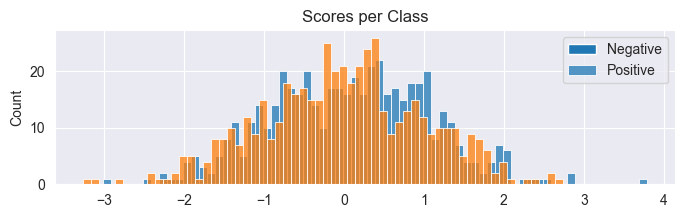

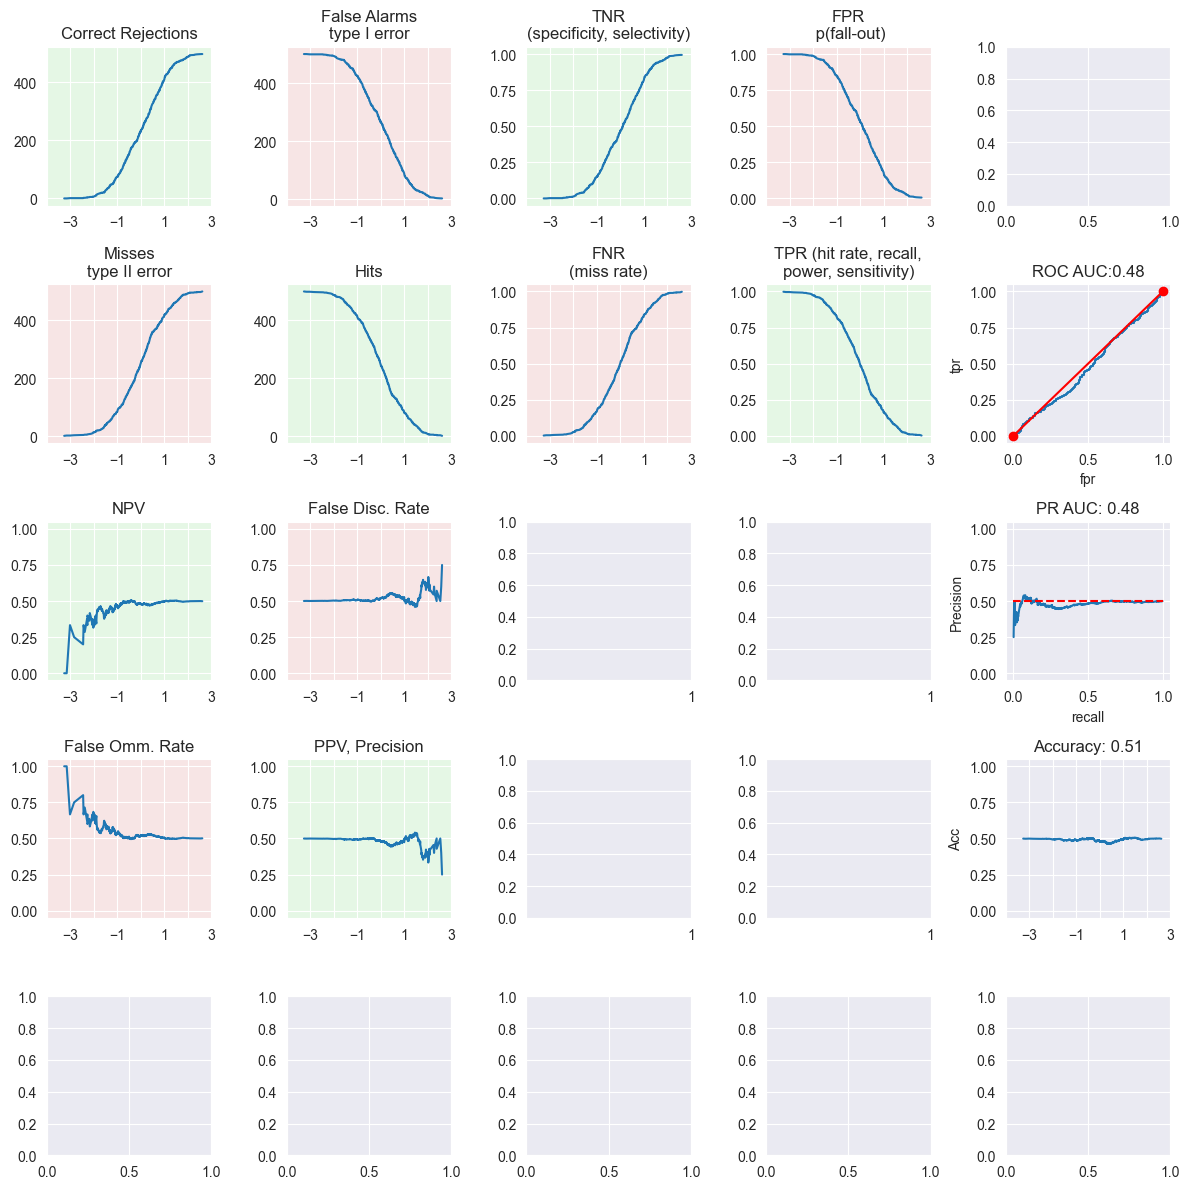

In [3]:
y, scores = get_scores(negative_sample_n=500,
                       positive_sample_n=500,
                       mu=[0, 0],
                       sigma=[1, 1],)

thresholds = np.sort(scores)
metrics = test_thresholds(y, scores, thresholds)
plot_scores(y,scores)
ax = metrics_panel(metrics)
# Note how the high threshold regions have high noise level on the estimates of precision and npv.
# Why?
# Because the number of positive predictions is very low, so the denominator and nominator are very close to each other, hence higher noise.

# A descent classifier

/var/folders/zz/f2k510dd2q734m41l4fbhbhw0000gq/T/ipykernel_52662/1198195556.py:158: RuntimeWarning: invalid value encountered in double_scalars
  return 2 * (precision(y, yhat, cm) * recall(y, yhat, cm)) / (precision(y, yhat, cm) + recall(y, yhat, cm))
/var/folders/zz/f2k510dd2q734m41l4fbhbhw0000gq/T/ipykernel_52662/1198195556.py:163: RuntimeWarning: invalid value encountered in double_scalars
  return 5 * (precision(y, yhat, cm) * recall(y, yhat, cm)) / (4 * precision(y, yhat, cm) + recall(y, yhat, cm))


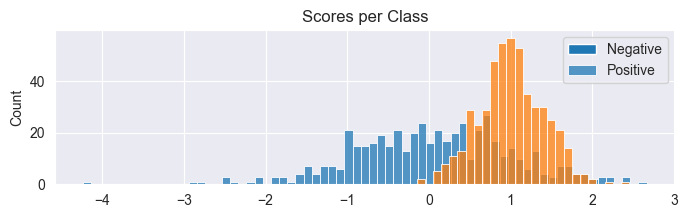

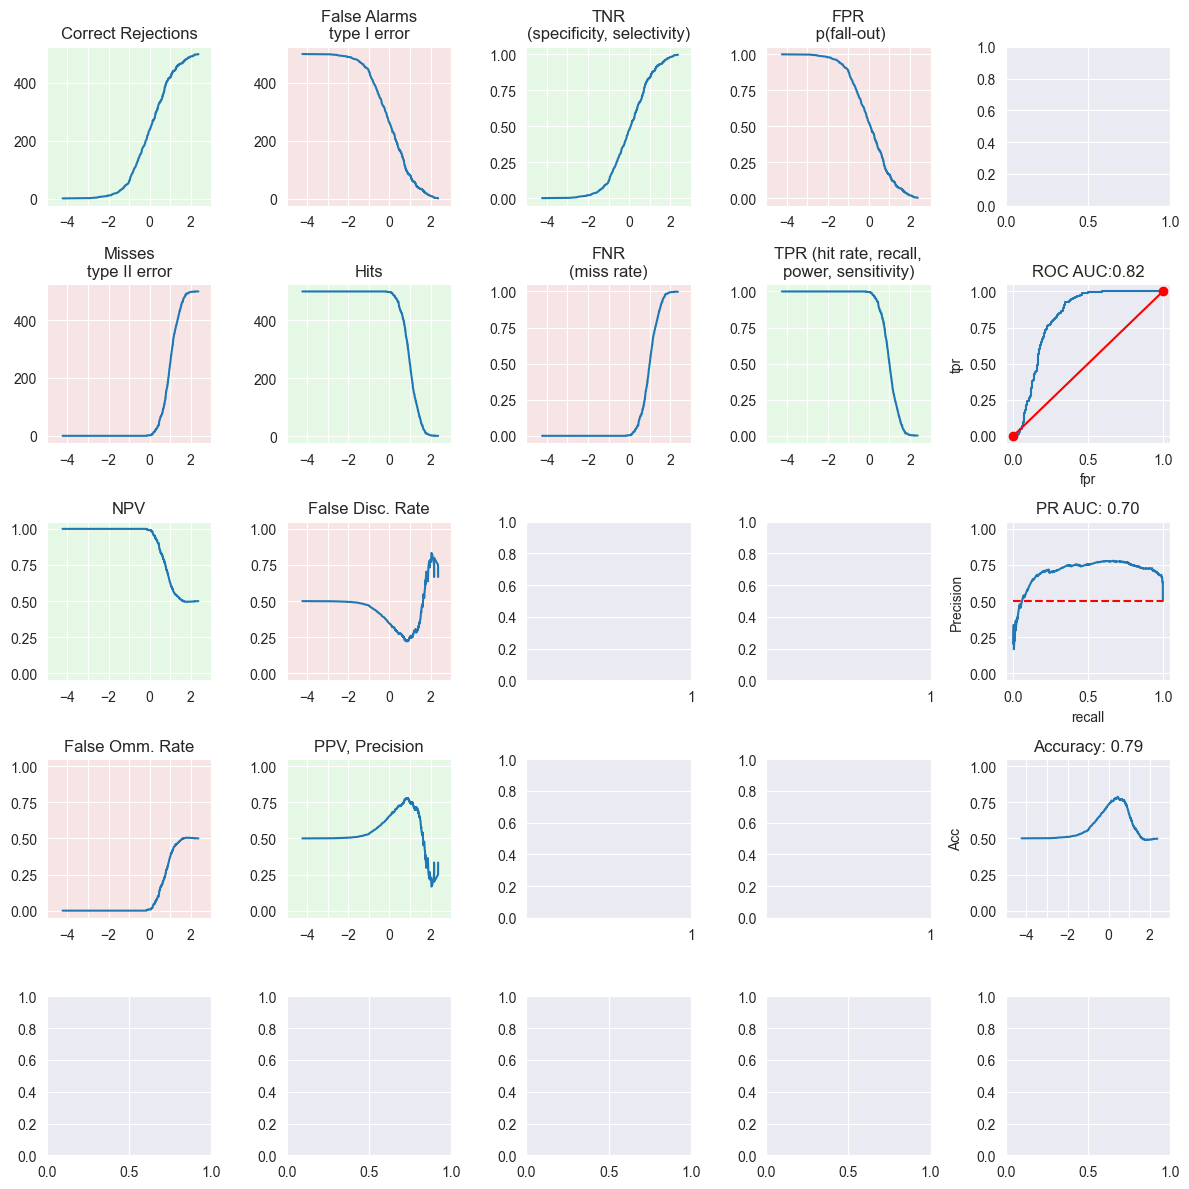

In [4]:
y, scores = get_scores(negative_sample_n=500,
                       positive_sample_n=500,
                       mu=[0, 1],
                       sigma=[1, 0.4],)

thresholds = np.sort(scores)[:-1]
metrics = test_thresholds(y, scores, thresholds)
plot_scores(y,scores)
ax = metrics_panel(metrics)
# Note how the high threshold regions have high noise level on the estimates of precision and npv.
# Why?
# Because the number of positive predictions is very low, so the denominator and nominator are very close to each other, hence higher noise.

# WHO Test Requirement

In [5]:
# Let's generate scores that mimics the performance of a diagnostic test aligned with the specifications of the WHO in terms of sensitivity and specificity.
# For HIV antibody assays, WHO recommends that a test should have a sensitivity of 99% and a specificity of 98%.
from scipy.stats import norm
desired_sensitivity = .99
desired_specificity = .98
# where do we put the threshold to get the desired specificity? We use inverse of the cdf of the normal distribution
mu_negative = 0
threshold = norm.ppf(desired_specificity)
# now let's find the distance of this threshold from the mean in the positive distribution
mu_positive = norm.ppf(desired_sensitivity) + threshold
mu = [mu_negative, mu_positive]

/var/folders/zz/f2k510dd2q734m41l4fbhbhw0000gq/T/ipykernel_52662/1198195556.py:118: RuntimeWarning: invalid value encountered in long_scalars
  return cm[0,1] / (cm[0,1] + cm[1,1])
/var/folders/zz/f2k510dd2q734m41l4fbhbhw0000gq/T/ipykernel_52662/1198195556.py:132: RuntimeWarning: invalid value encountered in long_scalars
  return cm[1,1] / (cm[0,1] + cm[1,1])


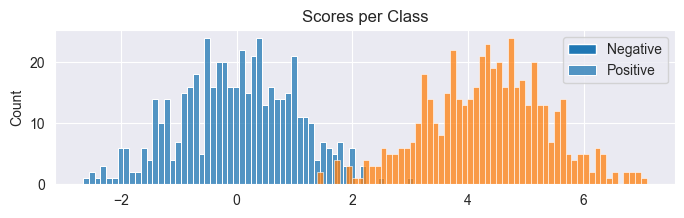

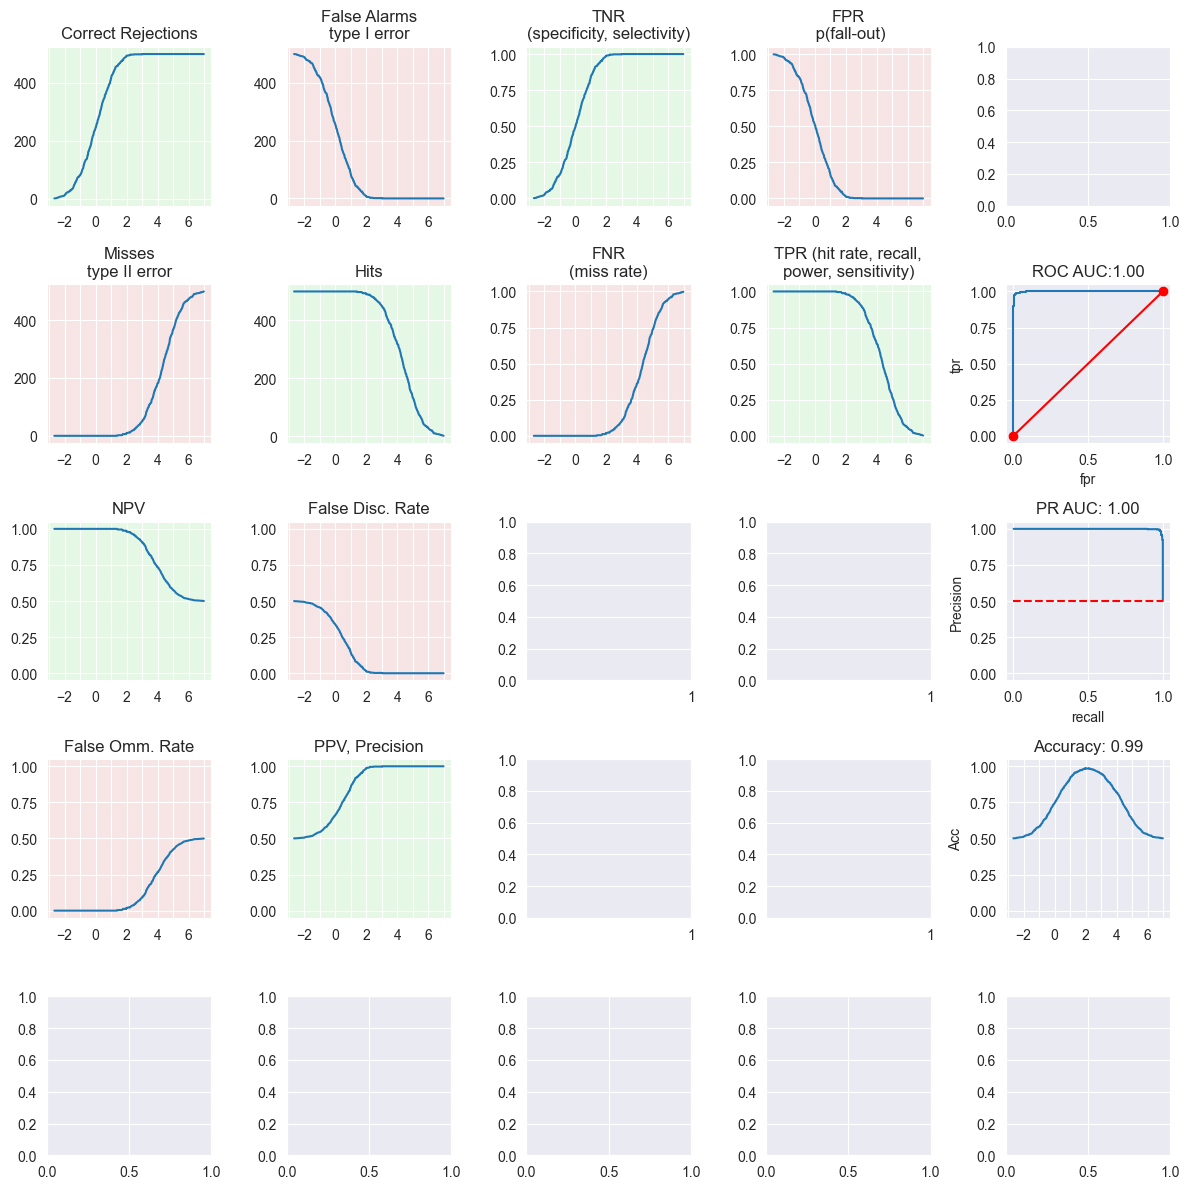

In [6]:
y, scores = get_scores(negative_sample_n=500,
                       positive_sample_n=500,
                       mu=mu,
                       sigma=[1, 1],)

thresholds = np.sort(scores)
metrics = test_thresholds(y, scores, thresholds)
plot_scores(y,scores)
ax = metrics_panel(metrics);
# Note how the high threshold regions have high noise level on the estimates of precision and npv.
# Why?
# Because the number of positive predictions is very low, so the denominator and nominator are very close to each other, hence higher noise.

## Comparing both AUC metrics using un-balanced datasets

In [7]:
# Let's generate two score sets where AUC is not able to find a great difference.
# To achieve this we need to create two sets of scores

/var/folders/zz/f2k510dd2q734m41l4fbhbhw0000gq/T/ipykernel_52662/1198195556.py:118: RuntimeWarning: invalid value encountered in long_scalars
  return cm[0,1] / (cm[0,1] + cm[1,1])
/var/folders/zz/f2k510dd2q734m41l4fbhbhw0000gq/T/ipykernel_52662/1198195556.py:132: RuntimeWarning: invalid value encountered in long_scalars
  return cm[1,1] / (cm[0,1] + cm[1,1])
/var/folders/zz/f2k510dd2q734m41l4fbhbhw0000gq/T/ipykernel_52662/1198195556.py:118: RuntimeWarning: invalid value encountered in long_scalars
  return cm[0,1] / (cm[0,1] + cm[1,1])
/var/folders/zz/f2k510dd2q734m41l4fbhbhw0000gq/T/ipykernel_52662/1198195556.py:132: RuntimeWarning: invalid value encountered in long_scalars
  return cm[1,1] / (cm[0,1] + cm[1,1])


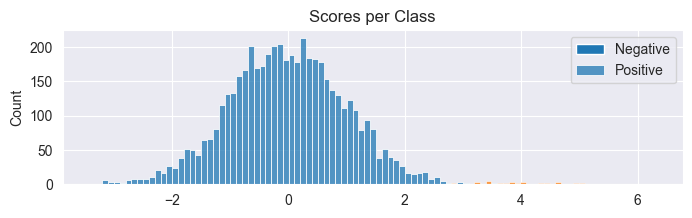

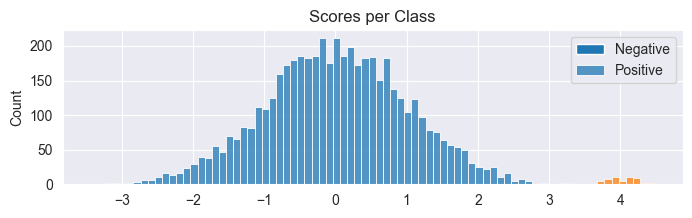

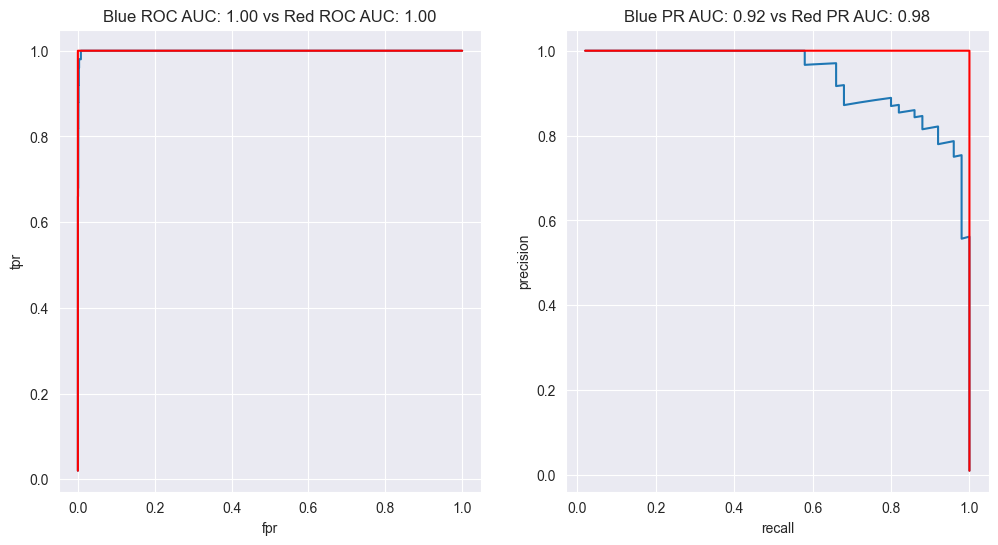

In [8]:
# Create a strong and a weak classifier based on presumably the same underlying distribution with different unbalance.
neg_n = 5000
pos_n = 50
y_0, scores_0 = get_scores(negative_sample_n=neg_n,
                           positive_sample_n=pos_n,
                           mu=[0, 4],
                           sigma=[1, 1])

y_1, scores_1 = get_scores(negative_sample_n=neg_n,
                           positive_sample_n=pos_n,
                           mu=[0, 4],
                           sigma=[1, .2])

metrics_0 = test_thresholds(y_0, scores_0, np.sort(scores_0))
metrics_1 = test_thresholds(y_1, scores_1, np.sort(scores_1))

plot_scores(y_0,scores_0)
plot_scores(y_1,scores_1)
#
fig, ax = plt.subplots(1,2,figsize=(12,6))
# plot the roc curves auc
metrics_0.plot(x='fpr',y='tpr',ax=ax[0])
metrics_1.plot(x='fpr',y='tpr',ax=ax[0], color='red')
roc_auc_0, roc_auc_1 = auc_from_rates(metrics_0['tpr'], metrics_0['fpr']), auc_from_rates(metrics_1['tpr'], metrics_1['fpr'])
ax[0].set_ylabel('tpr')
ax[0].set_title(f"Blue ROC AUC: {roc_auc_0:.2f} vs Red ROC AUC: {roc_auc_1:.2f}")
ax[0].legend().set_visible(False) # # remove legend

# plot the pr curves and auc
metrics_0.plot(x='recall',y='precision',ax=ax[1])
metrics_1.plot(x='recall',y='precision',ax=ax[1], color='red')
pr_auc_0, pr_auc_1 = auc_from_rates(metrics_0['precision'], metrics_0['recall']), auc_from_rates(metrics_1['precision'], metrics_1['recall'])
ax[1].set_ylabel('precision')
ax[1].set_title(f"Blue PR AUC: {pr_auc_0:.2f} vs Red PR AUC: {pr_auc_1:.2f}")
ax[1].legend().set_visible(False) # # remove legend

# Learnings:
# So when the data is unbalanced, the ROC curve is not a good metric to compare classifiers. The Precision picks up on the sigma of the positive class.

# Bootstrap analysis of variance of the metrics in case of a balance and equal distribution of the classes.

In [9]:
# Bootstrap analysis of variance of the metrics in case of a balance and equal distribution of the classes.
metrics = [test_thresholds(*get_scores(negative_sample_n=100, positive_sample_n=100), thresholds) for i in range(1000)]
plot_metrics( pd.concat(dict(enumerate(metrics))).std(level=1))

# here we always take the same distributions for both classes and compute precision and recall for different thresholds for n times.
# we compute the starndard deviation of the metrics for each repetition.
# Note that negative predicive power and precision are very noisy for extreme thresholds.

/var/folders/zz/f2k510dd2q734m41l4fbhbhw0000gq/T/ipykernel_52662/1198195556.py:111: RuntimeWarning: invalid value encountered in long_scalars
  return cm[0,0] / (cm[0,0] + cm[1,0])
/var/folders/zz/f2k510dd2q734m41l4fbhbhw0000gq/T/ipykernel_52662/1198195556.py:125: RuntimeWarning: invalid value encountered in long_scalars
  return cm[1,0] / (cm[1,0] + cm[0,0])
/var/folders/zz/f2k510dd2q734m41l4fbhbhw0000gq/T/ipykernel_52662/1198195556.py:118: RuntimeWarning: invalid value encountered in long_scalars
  return cm[0,1] / (cm[0,1] + cm[1,1])
/var/folders/zz/f2k510dd2q734m41l4fbhbhw0000gq/T/ipykernel_52662/1198195556.py:132: RuntimeWarning: invalid value encountered in long_scalars
  return cm[1,1] / (cm[0,1] + cm[1,1])
/var/folders/zz/f2k510dd2q734m41l4fbhbhw0000gq/T/ipykernel_52662/1198195556.py:158: RuntimeWarning: invalid value encountered in double_scalars
  return 2 * (precision(y, yhat, cm) * recall(y, yhat, cm)) / (precision(y, yhat, cm) + recall(y, yhat, cm))
/var/folders/zz/f2k510d

NameError: name 'plot_metrics' is not defined

## Resources:
https://c3.ai/blog/using-binary-classification-metrics-to-maximize-enterprise-ais-potential/#:~:text=The%20F%CE%B2%20score%20is%20a,a%20specific%20choice%20of%20threshold.